In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Load data
train_raw = pd.read_csv("Data/train.csv")
test_raw = pd.read_csv("Data/test.csv")

In [2]:
# Number of observations and features
print train_raw.shape
print test_raw.shape

(76020, 371)
(75818, 370)


Dataset consists of training and test sets provided by Kaggle. Each have 369 features and ID. Training set has an additional column, TARGET, containing the correct classifications. Training set has 76 020 observations and test set has 75 818 observations.

In [3]:
# Variable names and types
print train_raw.dtypes.value_counts()
print train_raw.columns

int64      260
float64    111
dtype: int64
Index([u'ID', u'var3', u'var15', u'imp_ent_var16_ult1',
       u'imp_op_var39_comer_ult1', u'imp_op_var39_comer_ult3',
       u'imp_op_var40_comer_ult1', u'imp_op_var40_comer_ult3',
       u'imp_op_var40_efect_ult1', u'imp_op_var40_efect_ult3',
       ...
       u'saldo_medio_var33_hace2', u'saldo_medio_var33_hace3',
       u'saldo_medio_var33_ult1', u'saldo_medio_var33_ult3',
       u'saldo_medio_var44_hace2', u'saldo_medio_var44_hace3',
       u'saldo_medio_var44_ult1', u'saldo_medio_var44_ult3', u'var38',
       u'TARGET'],
      dtype='object', length=371)


Data is anonymised, and variable names apart from ID and TARGET are rather cryptic. More information on their meaning is not available on Kaggle site either. 258 variables (ID and TARGET excluded) are integers, possibly presenting categorical data, and 111 variables are numerical. 

In [4]:
# Missing values (null)
print train_raw.isnull().sum().sum()
print test_raw.isnull().sum().sum()

0
0


Datasets do not contain missing values.

In [5]:
# Descriptive statistics on TARGET
print train_raw['TARGET'].describe()
print ""
print train_raw['TARGET'].value_counts()
print train_raw['TARGET'].value_counts() / train_raw.shape[0]

count    76020.000000
mean         0.039569
std          0.194945
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: TARGET, dtype: float64

0    73012
1     3008
Name: TARGET, dtype: int64
0    0.960431
1    0.039569
Name: TARGET, dtype: float64


Most of the customers are satisfied. Only 3.96 % of customers are unsatisfied. TARGET is thus inbalanced in that most of the cases come from single class. This might present a challenge in evaluating prediction results, as even a naive classifier predicting always the more common class could get an impressive looking 96 % accuracy.

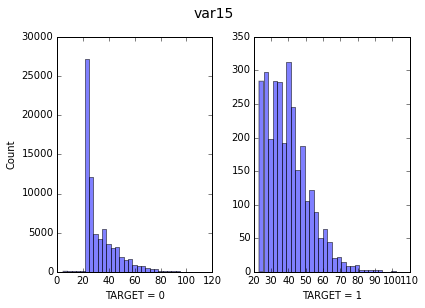

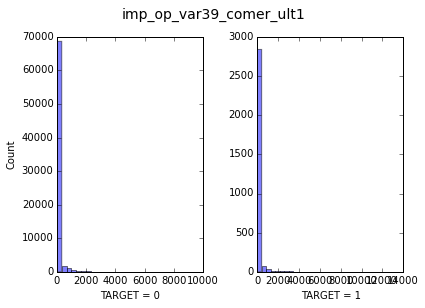

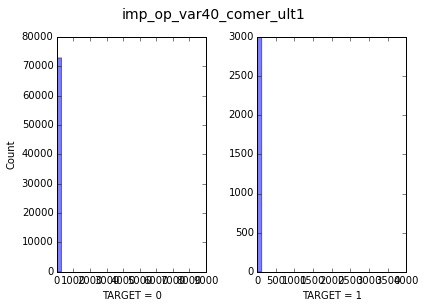

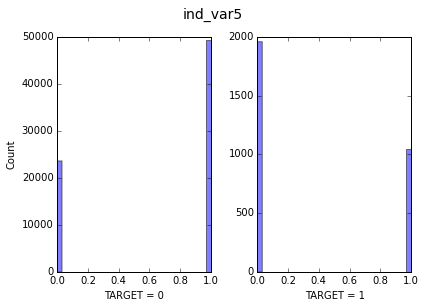

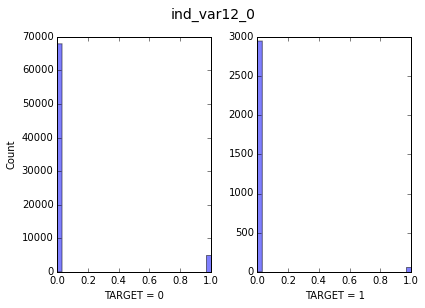

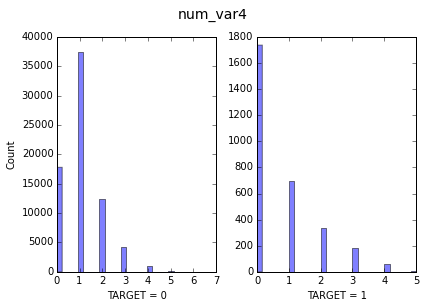

In [6]:
# Histograms and descriptive statistics of some typical variables
typical = ['var15', 'imp_op_var39_comer_ult1',
           'imp_op_var40_comer_ult1', 'ind_var5', 
           'ind_var12_0', 'num_var4']

# Histograms
for colname in typical:
    # Set up figure and two subplots
    fig = plt.figure(1)
    fig1 = fig.add_subplot(1,2,1)
    fig2 = fig.add_subplot(1,2,2)
    
    # Subset data by TARGET value
    x = train_raw[colname][train_raw['TARGET'] == 0].values
    y = train_raw[colname][train_raw['TARGET'] == 1].values
    
    # Create histograms
    fig1.hist(x, bins=30, alpha=0.5)
    fig2.hist(y, bins=30, alpha=0.5)
    
    # Set axis labels
    fig1.set_xlabel("TARGET = 0")
    fig2.set_xlabel("TARGET = 1")
    fig1.set_ylabel('Count')
    
    # Set figure title
    st = fig.suptitle(colname, fontsize=14)
    
    # Adjust layout
    st.set_y(1.05)
    fig.tight_layout()
    
    plt.show()

In [7]:
# Descriptive statistics
print train_raw[typical].describe()

              var15  imp_op_var39_comer_ult1  imp_op_var40_comer_ult1  \
count  76020.000000             76020.000000             76020.000000   
mean      33.212865                72.363067                 3.559130   
std       12.956486               339.315831                93.155749   
min        5.000000                 0.000000                 0.000000   
25%       23.000000                 0.000000                 0.000000   
50%       28.000000                 0.000000                 0.000000   
75%       40.000000                 0.000000                 0.000000   
max      105.000000             12888.030000              8237.820000   

           ind_var5   ind_var12_0      num_var4  
count  76020.000000  76020.000000  76020.000000  
mean       0.663760      0.067522      1.079440  
std        0.472425      0.250925      0.909566  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        1.000000      0.000000      1.0

Histograms show different types of variables found in the dataset, grouped by TARGET value. There are numerical variables with skewed distributions. Depending on the learning algorithm normalizing them might be necessary. Many of the variables are integer variables, and of those several are actually binary variables. On visual inspection of histograms it is difficult to find variables where difference between TARGET values would be striking. Difference between classes is therefore likely to reside in interaction between several variables, which makes visual exploratory investigation of relationships challenging when there is several hundred features. Main use for data exploration in this case is therefore identifying possible errors in variables and data points.

In [8]:
# Descriptive statistics of suspicious variables

# Suspicious variables
suspicious = ['var3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1y3',
              'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3',
              'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3',
              'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3',
              'delta_num_venta_var44_1y3', 'num_var2_0_ult1',
              'num_var2_ult1', 'num_reemb_var13_hace3',
              'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3',
              'saldo_medio_var13_medio_hace3']
print train_raw[suspicious].describe()

                var3  delta_num_compra_var44_1y3  delta_num_reemb_var13_1y3  \
count   76020.000000                7.602000e+04               7.602000e+04   
mean    -1523.199277                9.208103e+06               4.998685e+06   
std     39033.462364                3.033108e+08               2.235230e+08   
min   -999999.000000               -1.000000e+00               0.000000e+00   
25%         2.000000                0.000000e+00               0.000000e+00   
50%         2.000000                0.000000e+00               0.000000e+00   
75%         2.000000                0.000000e+00               0.000000e+00   
max       238.000000                1.000000e+10               1.000000e+10   

       delta_num_reemb_var17_1y3  delta_num_reemb_var33_1y3  \
count               7.602000e+04               7.602000e+04   
mean                2.630887e+06               1.315443e+05   
std                 1.621798e+08               3.626904e+07   
min                -1.000000e+00    

Exploring descriptive statistics and histograms of all features revealed above features as suspicious. They contain either a few suspiciously large and round values (e.g. -999999, when all other datapoints are positive), or have zero variance, making them useless for differentiating between TARGET classes.

In [9]:
# Count number of values less than 0 in var3
print train_raw['var3'][train_raw['var3'] < 0].value_counts()
print "\n"

# Value counts for other suspicious variables
for colname in suspicious:
    if colname is not 'var3':
        print train_raw[colname].value_counts()
        print "\n"

-999999    116
Name: var3, dtype: int64


 0.000000e+00    75923
 1.000000e+10       70
-1.000000e+00       18
 1.000000e+00        3
 4.000000e+00        2
-3.333333e-01        1
-6.666667e-01        1
 2.500000e+00        1
 5.000000e-01        1
Name: delta_num_compra_var44_1y3, dtype: int64


0             75982
9999999999       38
Name: delta_num_reemb_var13_1y3, dtype: int64


 0             75999
 9999999999       20
-1                 1
Name: delta_num_reemb_var17_1y3, dtype: int64


0             76019
9999999999        1
Name: delta_num_reemb_var33_1y3, dtype: int64


 0             76014
 9999999999        4
-1                 2
Name: delta_num_trasp_var17_in_1y3, dtype: int64


0             76016
9999999999        4
Name: delta_num_trasp_var17_out_1y3, dtype: int64


 0             76009
-1                 6
 9999999999        5
Name: delta_num_trasp_var33_in_1y3, dtype: int64


0             76019
9999999999        1
Name: delta_num_trasp_var33_out_1y3, dtype: int64


 0.

Further exploration of suspicious variables reveals they contain mostly zeros or a few extremely large values. They are not usable for prediction, and can thus be safely removed, except maybe for var3. After removing extreme values that are likely errors in data, var3 might be useful. var3 is fixex by imputing median value to suspicious data points.

In [10]:
# Fix var3 extreme values by changing them to median values
var3_median = train_raw["var3"].median()
train_raw.loc[train_raw['var3'] < 0, "var3"] = var3_median

# Remove columns with suspicious values, except for var3
suspicious.remove("var3")           # Remove var3 from removal list

# Drop suspicious columns
train_raw.drop(suspicious, axis=1)
test_raw.drop(suspicious, axis=1)
print "Removed %s suspicious colums." % str(len(suspicious))

# Remove any additional columns with no variance
remove = []
for colname in train_raw:
    if train_raw[colname].std() == 0:
        remove.append(colname)
        
train_raw = train_raw.drop(remove, axis=1)
test_raw = test_raw.drop(remove, axis=1)
print "Removed %s zero variance columns." % str(len(remove))

# Remove possible duplicated columns
cols_orig = train_raw.shape[1]
train_raw = train_raw.drop_duplicates()
test_raw = test_raw.drop_duplicates()
cols_removed = cols_orig - train_raw.shape[1]
print "Removed %s duplicated columns." % str(cols_removed)

print "Training set dimensions: " + str(train_raw.shape)
print "Test set dimensions:     " + str(test_raw.shape)

Removed 15 suspicious colums.
Removed 34 zero variance columns.
Removed 0 duplicated columns.
Training set dimensions: (76020, 337)
Test set dimensions:     (75818, 336)


15 suspicious columns identified by visual inspection of descriptive statistics were removed from the datasets, along with 34 zero variance columns. After that there were no more duplicated columns left. After removals datasets contain 335 features, excluding ID and TARGET columns.

In [11]:
# Split data to training and test sets
from sklearn.cross_validation import train_test_split
features = train_raw.drop(["ID", "TARGET"], axis=1)
labels = train_raw["TARGET"]

train_X, test_X, train_y, test_y = train_test_split(features, labels, test_size=0.3,
                                                   random_state=12748, stratify=labels)

Above features and correct labels are extracted from raw data, and training set is split to training and test sets. 30 % of the training data is used for evaluating performance of different models. Competition test set is modified by separating ID variable.

In [12]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
import time

# Function to train classifiers
def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

# Create random forest classifier
random_state = 676845
clf = RandomForestClassifier(n_estimators=100, random_state=random_state)

# Train and display random forest
train_classifier(clf, train_X, train_y)
print clf

Training RandomForestClassifier...
Done!
Training time (secs): 19.064
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)


As a first step Random Forest classifier from scikit-learn package is used with almost default settings (number of estimators was increased from 10 to 100) to get a baseline model to improve on. Random state for the algorithm is set manually to keep the analysis repeatable. Normalizing features is not necessary when Random Forest classifier is use.

In [13]:
# Evaluation metrics: AUROC
from sklearn.metrics import roc_auc_score

# Function to evaluate classifier performance with AUROC
def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict_proba(features)[:,1]
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return roc_auc_score(target, y_pred)

# AUC score for training set
train_auc_roc_score = predict_labels(clf, train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.902
AUC score for training set: 0.997566718294


Even the default version of Random Forest Classifier achieves very good AUC score for the training set, 0.998. 

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.823
AUC score for test set: 0.758600343729


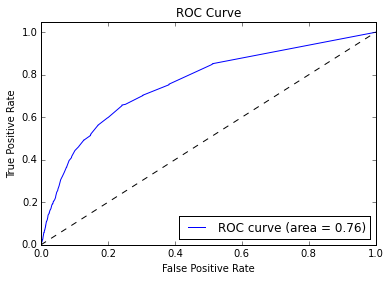

In [14]:
# AUC score for test set
test_auc_roc_score = predict_labels(clf, test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

# ROC curve
from sklearn.metrics import roc_curve, auc

def plot_roc(clf, test_X, test_y):
    fpr, tpr, _ = roc_curve(test_y, clf.predict_proba(test_X)[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(clf, test_X, test_y)

Accuracy on test set is less impressive 0.759. The classifier might be overfitting, that is, using random noise in the training set to make accurate predictions on training set, but generalizing poorly to unseen data.

/Users/juhosalminen1/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


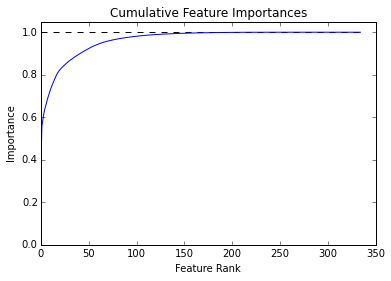

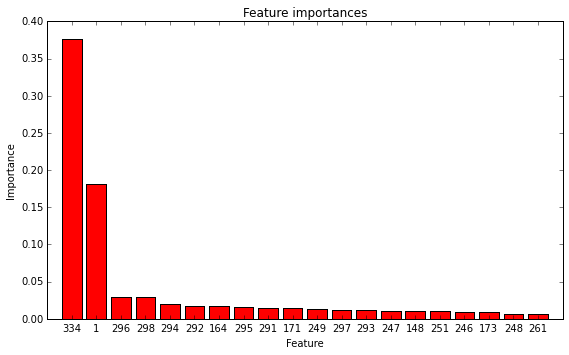

In [15]:
# Feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Number of features to show
n_features = 20

# Plot the feature importances
def plot_importances(clf, n_features=20):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8,5))
    plt.bar(range(n_features), importances[indices[:n_features]],
            color="r", align="center")
    plt.xticks(range(n_features), indices)
    plt.xlim([-1, n_features])
    plt.title("Feature importances")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

# Plot cumulative importances
def plot_cumulative_importances(clf, n_features=200):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    cum_importances = importances[indices[:n_features]].cumsum()
    
    plt.figure()
    plt.plot(cum_importances)
    plt.ylim(0,1.05)
    plt.hlines(1, 0, n_features, linestyles="dashed")
    plt.title("Cumulative Feature Importances")
    plt.xlabel("Feature Rank")
    plt.ylabel("Importance")
    plt.show()

plot_cumulative_importances(clf, n_features=train_X.shape[1])    
plot_importances(clf)

Feature importances drop fast after the first two most useful features. Plotting the top features shows this clearly. Next 150 most important features are used for builiding a model in order to reduce random noise due to less useful features.

In [16]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print [train_raw.columns.values[i] for i in indices[:150]]

['saldo_medio_var44_ult3', 'var3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'num_var45_ult1', 'num_var45_hace2', 'saldo_var29', 'num_var45_ult3', 'num_venta_var44_ult1', 'saldo_var40', 'num_var22_ult1', 'saldo_medio_var5_hace3', 'num_var45_hace3', 'num_var22_hace2', 'saldo_var1', 'num_med_var22_ult3', 'num_ent_var16_ult1', 'saldo_var44', 'num_var22_hace3', 'num_meses_var33_ult3', 'num_med_var45_ult3', 'num_var22_ult3', 'imp_op_var41_efect_ult3', 'imp_op_var39_efect_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_efect_ult1', 'num_var34', 'imp_op_var39_comer_ult1', 'imp_var43_emit_ult1', 'imp_op_var39_efect_ult1', 'num_op_var39_ult1', 'var15', 'imp_op_var40_ult1', 'num_op_var41_ult1', 'imp_ent_var16_ult1', 'num_op_var41_comer_ult1', 'saldo_var34', 'num_op_var39_comer_ult1', 'imp_op_var41_ult1', 'num_op_var39_hace3', 'num_op_var40_ult3', 'num_op_var41_ult3', 'num_op_var41_efect_ult1', 'num_var1', 'num_op_var41_hace3', 'imp_op_var41_comer_ult3', 'ind_var30_0', 'num_op_var39_efec

Training RandomForestClassifier...
Done!
Training time (secs): 12.520
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.539
AUC score for training set: 0.990764901446
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.682
AUC score for test set: 0.759028993074


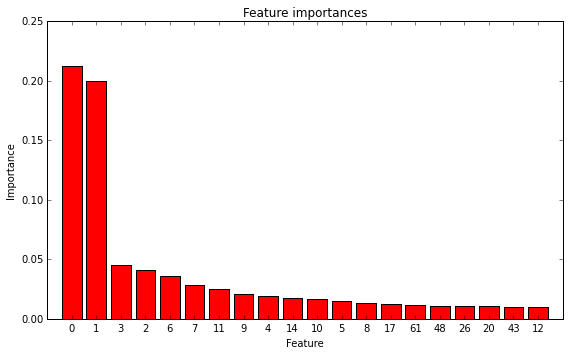

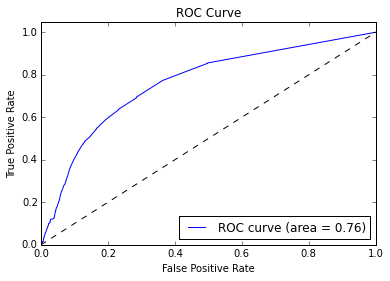

In [17]:
# Select features

# Use only 150 most important features
n_features = 150
train_X_subset = train_X[indices[:n_features]]
test_X_subset = test_X[indices[:n_features]]

# Create random forest classifier
clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", 
                            random_state=random_state)

# Train and display random forest
train_classifier(clf, train_X_subset, train_y)
print clf

train_auc_roc_score = predict_labels(clf, train_X_subset, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, test_X_subset, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_importances(clf, n_features=20)

plot_roc(clf, test_X_subset, test_y)

Reducing the number of features to use for prediction to only the 150 most important features did not change AUC score on test set significantly. Balanced class weights are used due to very imbalanced number of cases from different TARGET classes. Another approach to reduce overfitting is dimension reduction in the hopes of improving signal to noise ratio of the data.

[[  1.16722156e-11  -1.08629464e-09  -2.06456053e-07 ...,   1.02504067e-09
    6.87017040e-10  -1.42003371e-06]
 [  1.10203430e-10   1.02873099e-09   1.81661405e-08 ...,   2.33271790e-06
    2.18550222e-06  -2.14095947e-07]
 [ -2.21820926e-10   6.55358545e-11  -4.13169371e-09 ...,   1.25652979e-08
   -2.11651691e-08   1.90446571e-06]
 ..., 
 [  0.00000000e+00   3.37875909e-19   1.72580286e-20 ...,   4.73349065e-21
   -9.19362010e-21   1.03603231e-23]
 [  0.00000000e+00   6.07925461e-09  -9.14731743e-11 ...,  -6.21341520e-13
   -1.65155303e-12   9.60342916e-15]
 [  0.00000000e+00   1.39216250e-08  -2.03850016e-10 ...,   1.23737982e-11
   -1.83992196e-11  -1.22124533e-15]]


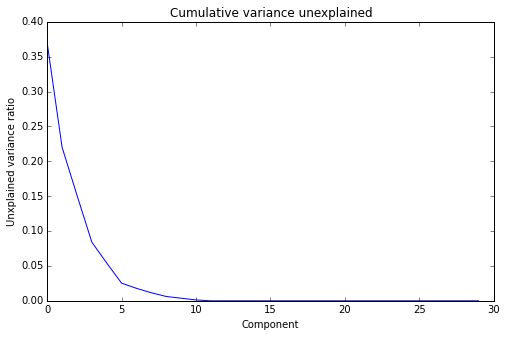

In [18]:
# Dimension reduction, all dimensions
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=train_X.shape[1])
pca.fit(train_X)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_

# Figure on variance explained
x = range(30)
y = 1 - np.cumsum(pca.explained_variance_ratio_[:30])
plt.figure(figsize=(8,5))
plt.clf()
plt.plot(x, y)
plt.title("Cumulative variance unexplained")
plt.xlabel("Component")
plt.ylabel("Unxplained variance ratio")
plt.show()

Applying principal component analysis (PCA) on training data and plotting the fraction of variance explained drops to practically zero with only 15 components. Next random forest is used to assess component importances for prediction.

(53214, 335)
(22806, 335)
Training RandomForestClassifier...
Done!
Training time (secs): 85.137
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.670
AUC score for training set: 0.990665777984
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.659
AUC score for test set: 0.742570103325


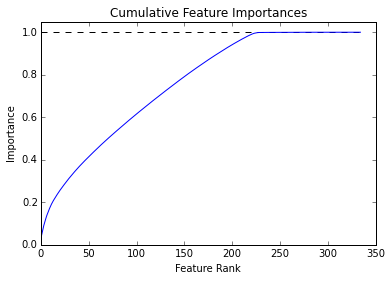

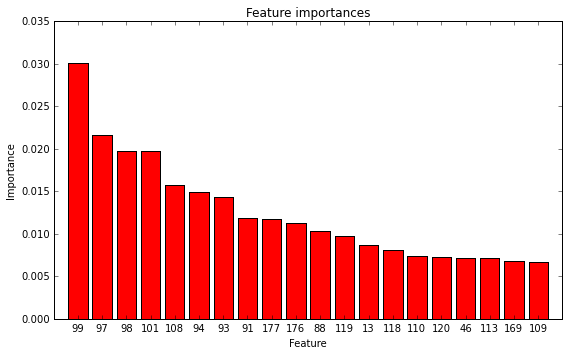

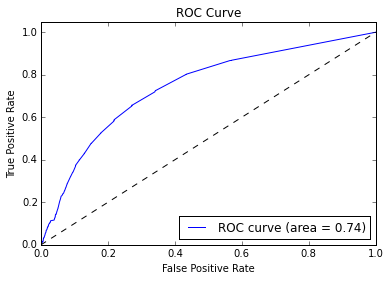

In [19]:
# Transform data
reduced_train_X = pca.fit_transform(train_X)
reduced_test_X = pca.transform(test_X)

print reduced_train_X.shape
print reduced_test_X.shape

# Random forest with reduced dimensionality
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', 
                            random_state=random_state)

train_classifier(clf, reduced_train_X, train_y)
print clf

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_cumulative_importances(clf, n_features=train_X.shape[1]) 
plot_importances(clf, n_features=20)
plot_roc(clf, reduced_test_X, test_y)

Approximately 220 components provide useful information for random forest algorithm. 

In [20]:
# Dimension reduction, fewer dimensions
pca = PCA(n_components = 220)
pca.fit(train_X)

# Transform data
reduced_train_X = pca.fit_transform(train_X)
reduced_test_X = pca.transform(test_X)

print reduced_train_X.shape
print reduced_test_X.shape

(53214, 220)
(22806, 220)


Training RandomForestClassifier...
Done!
Training time (secs): 72.754
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.625
AUC score for training set: 0.99070625332
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.571
AUC score for test set: 0.752883526017


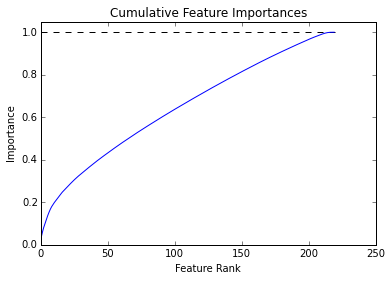

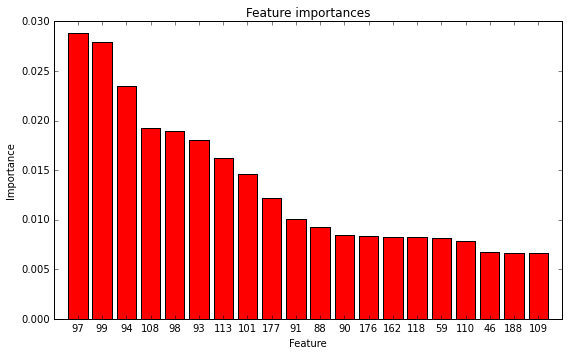

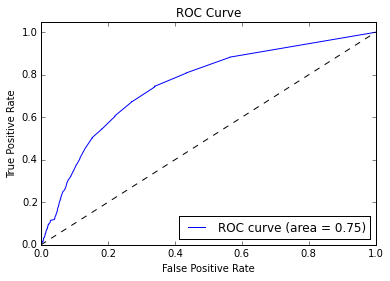

In [21]:
# Random forest with reduced dimensionality
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', 
                            random_state=random_state)

train_classifier(clf, reduced_train_X, train_y)
print clf

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_cumulative_importances(clf, n_features=220) 
plot_importances(clf, n_features=20)
plot_roc(clf, reduced_test_X, test_y)

Reducing dimensionality does not provide significant improvements on AUC score on the test set. Next step is to optimize Random Forest Classifier in terms of number of estimators, maximum depth of trees and maximum number of features to consider at each split.  

Training GridSearchCV...
Done!
Training time (secs): 1146.806
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=2,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 1.900
AUC score for training set: 0.990661285886
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.603
AUC score for test set: 0.750597623939


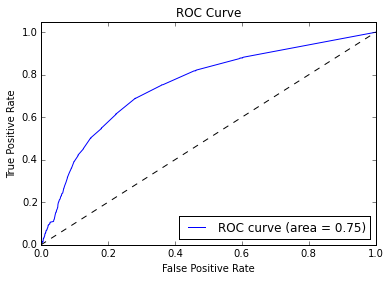

In [22]:
# Grid search for optimal maximum depth and maximum number of features
from sklearn.grid_search import GridSearchCV

rfc = RandomForestClassifier(class_weight="balanced", n_estimators=100, 
                            random_state=random_state)
parameters = {'max_depth': [None, 2, 4, 8, 16], 
              'max_features': [2, 4, 8, 15]}

clf = GridSearchCV(rfc, parameters)
train_classifier(clf, reduced_train_X, train_y)

# Print optimal random forest
print clf.best_estimator_

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

Random forest with max_depth=None and max_features=2 are the best parameters found with grid search. Next the number of estimators is optimized.

Training GridSearchCV...
Done!
Training time (secs): 197.682
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=2,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 1.882
AUC score for training set: 0.990661285886
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.628
AUC score for test set: 0.750597623939


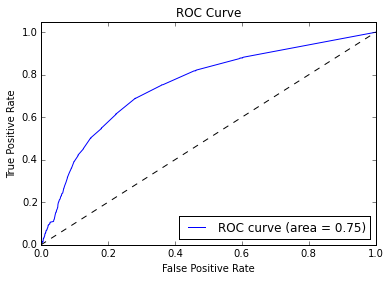

In [23]:
# Grid search for optimal number of estimators
rfc = RandomForestClassifier(class_weight="balanced", max_depth=None,
                             max_features=2, random_state=random_state)
parameters = {'n_estimators': [50, 100, 200, 300]}

clf = GridSearchCV(rfc, parameters)
train_classifier(clf, reduced_train_X, train_y)

# Print optimal random forest
print clf.best_estimator_

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

According to grid search the optimal parameters for Random Forest classifier are number of estimators: 100, maximum depth: unlimited, and maximum number of features to consider at each split: 2. However, there is no improvements on AUC score on the test set.

In [25]:
# Predict on Kaggle test set
test_pred = clf.predict_proba(reduced_test)[:,1]
# Create submission
submission = pd.DataFrame({"ID":test_ID, "TARGET":test_pred})
submission.to_csv("submission-fpr.csv", index=False)
print "Done!"

Done!


This submission would have scored around 0.748358 (ranking 4121/5123, 14 May 2016) on the public leaderboard for Kaggle Santander competition. The score is well over all zeros benchmark at 0.50, but clearly behind the top score 0.829072. 

Training GradientBoostingClassifier...
Done!
Training time (secs): 245.906
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.441
AUC score for training set: 0.865599353465
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.154
AUC score for test set: 0.839141424827


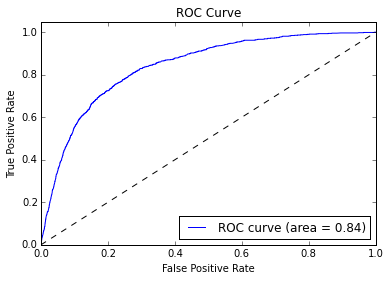

In [26]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier()

train_classifier(clf, reduced_train_X, train_y)
print clf

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

Training GridSearchCV...
Done!
Training time (secs): 1380.537
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.185
AUC score for training set: 0.925245101318
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.078
AUC score for test set: 0.830222365201


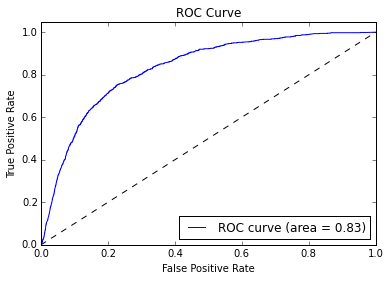

In [27]:
gbc = GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1,
                                max_depth=8, max_features='sqrt', subsample=0.8)

parameters = {'n_estimators': [20, 30, 40, 50, 60, 70, 80]}

clf = GridSearchCV(gbc, parameters)
train_classifier(clf, reduced_train_X, train_y)

print clf.best_estimator_

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

Training GridSearchCV...
Done!
Training time (secs): 3235.698
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=200,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.178
AUC score for training set: 0.85508991127
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.077
AUC score for test set: 0.832643558305


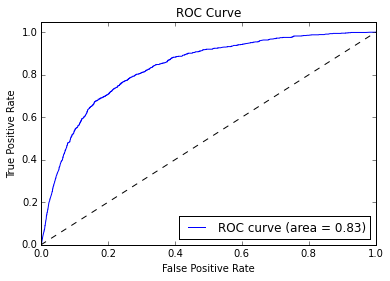

In [28]:
gbc = GradientBoostingClassifier(max_features='sqrt', subsample=0.8,
                                n_estimators=20)

parameters2 = {'max_depth':range(5,16,2), 'min_samples_split':(2,10,50,100,200,500)}

clf = GridSearchCV(gbc, parameters2)
train_classifier(clf, reduced_train_X, train_y)

print clf.best_estimator_

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

In [ ]:
gbc = GradientBoostingClassifier(max_depth=5, min_samples_split=200,
                                 subsample=0.8, n_estimators=20)

parameters2 = {'max_features':range(7,21,2)}

clf = GridSearchCV(gbc, parameters2)
train_classifier(clf, reduced_train_X, train_y)

print clf.best_estimator_

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

In [ ]:
gbc = GradientBoostingClassifier(max_depth=5, max_features=11, min_samples_split=500,
                                 n_estimators=30)

parameters3 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

clf = GridSearchCV(gbc, parameters3)
train_classifier(clf, reduced_train_X, train_y)

print clf.best_estimator_

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

Training GradientBoostingClassifier...
Done!
Training time (secs): 30.480
GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=5, max_features=11, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.301
AUC score for training set: 0.842910579247
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.133
AUC score for test set: 0.830269309618


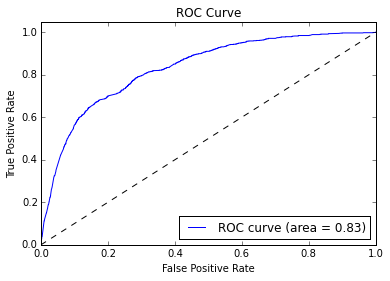

In [44]:
clf = GradientBoostingClassifier(max_depth=5, max_features=11, min_samples_split=500,
                                 subsample=0.9, n_estimators=60, learning_rate=0.05)

train_classifier(clf, reduced_train_X, train_y)

print clf

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

Training GradientBoostingClassifier...
Done!
Training time (secs): 137.978
GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=5, max_features=9, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 1.108
AUC score for training set: 0.838282320009
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.485
AUC score for test set: 0.826331419587


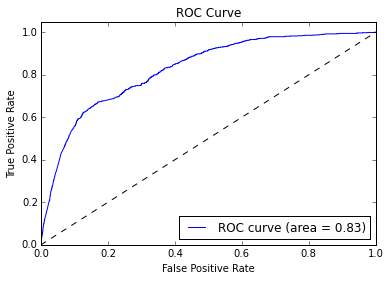

In [45]:
clf = GradientBoostingClassifier(max_depth=5, max_features=9, min_samples_split=500,
                                 subsample=0.9, n_estimators=300, learning_rate=0.01)

train_classifier(clf, reduced_train_X, train_y)

print clf

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

Training GradientBoostingClassifier...
Done!
Training time (secs): 884.476
GradientBoostingClassifier(init=None, learning_rate=0.005, loss='deviance',
              max_depth=5, max_features=9, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=200,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 2.878
AUC score for training set: 0.86875815778
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 1.216
AUC score for test set: 0.841982991899


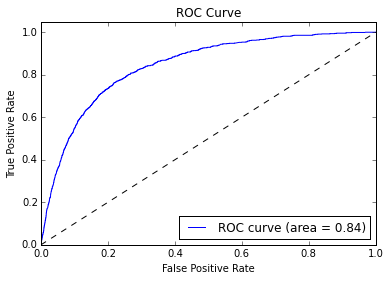

In [31]:
clf = GradientBoostingClassifier(max_depth=5, max_features=9, min_samples_split=200,
                                 subsample=0.8, n_estimators=600, learning_rate=0.005)

train_classifier(clf, reduced_train_X, train_y)

print clf

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_roc(clf, reduced_test_X, test_y)

In [32]:
# Optimal Gradient Boost on full data
train_full_X = train_raw.drop(["ID", "TARGET"], axis=1)
train_full_y = train_raw["TARGET"]

test = test_raw.drop(["ID"], axis=1)
test_ID = test_raw["ID"]

# Dimension reduction
reduced_train_full_X = pca.transform(train_full_X)
reduced_test = pca.transform(test)

clf = GradientBoostingClassifier(max_depth=5, max_features=9, min_samples_split=200,
                                 subsample=0.8, n_estimators=300, learning_rate=0.01)

train_classifier(clf, reduced_train_full_X, train_full_y)
print clf

Training GradientBoostingClassifier...
Done!
Training time (secs): 809.030
GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=5, max_features=9, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=200,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)


In [34]:
# Predict on Kaggle test set
test_pred = clf.predict_proba(reduced_test)[:,1]
# Create submission
submission = pd.DataFrame({"ID":test_ID, "TARGET":test_pred})
submission.to_csv("submission.csv", index=False)
print "Done!"

Done!
